# **Predicting Countries AI Potential for Venture Capital Investment**

---



# **1. Business Context:**
## **Defining the problem:**

A venture capital firm specializing in AI startups, needs to identify countries with high growth potential in AI capabilities to guide their investment strategy. Currently, decisions are based on subjective expert opinions, leading to inconsistent outcomes.

## **ML Task:**

To Build a predictive model to quantify countries AI potential (using the Total score from the AI Index dataset) based on key indicators like Talent, Infrastructure, and Government Strategy. This will enable data-driven investment decisions.

## **Data Source:**

AI country Index Dataset (Kaggle: https://www.kaggle.com/datasets/katerynameleshenko/ai-index).

## **Impact:**

Cost Reduction: Minimize investment risks by prioritizing high-potential markets.

Strategic Advantage: Identify underrated countries before competitors.


---



# **2. Data Exploration**

## Importing required libraries

In [8]:
import pandas as pnd
import numpy as nmp
import seaborn as sbn
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Data is loaded

In [9]:
dataframe = pnd.read_csv('AI_index_db.csv')

## Displaying and exploring the data

In [10]:
print("Basic Information:")
print(dataframe.info())
print("\nTotal values Missing in data:")
print(dataframe.isnull().sum())
print("\nStatistics:")
print(dataframe.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB
None

Total values Missing in data:
Country   

## Exploring the correlations

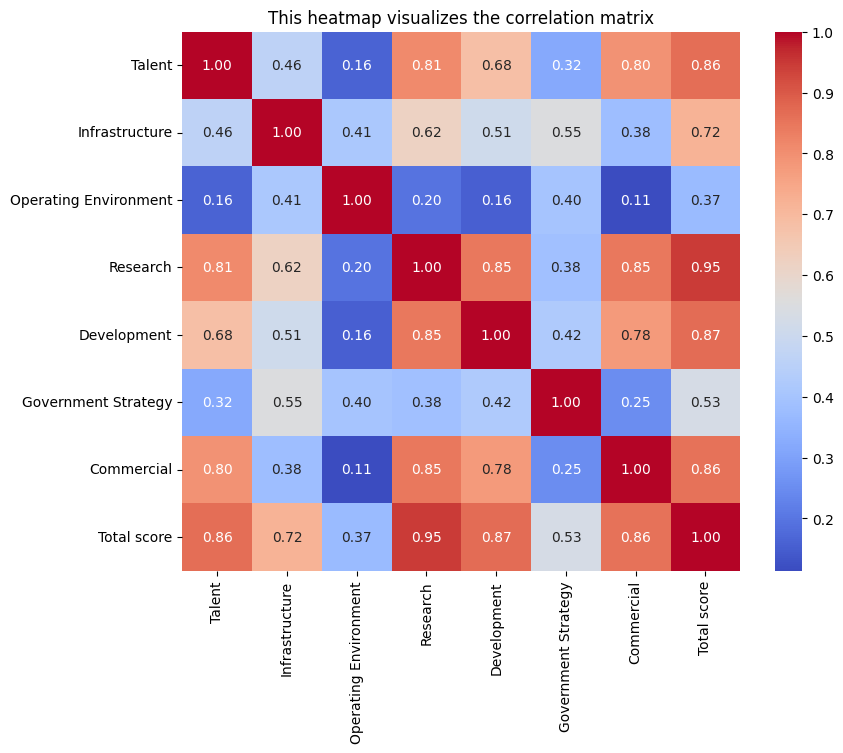

In [11]:
plot.figure(figsize=(9, 7))
correlation_matrix = dataframe.corr(numeric_only=True)
sbn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plot.title("This heatmap visualizes the correlation matrix")
plot.show()


## Ploting distribution of target variable

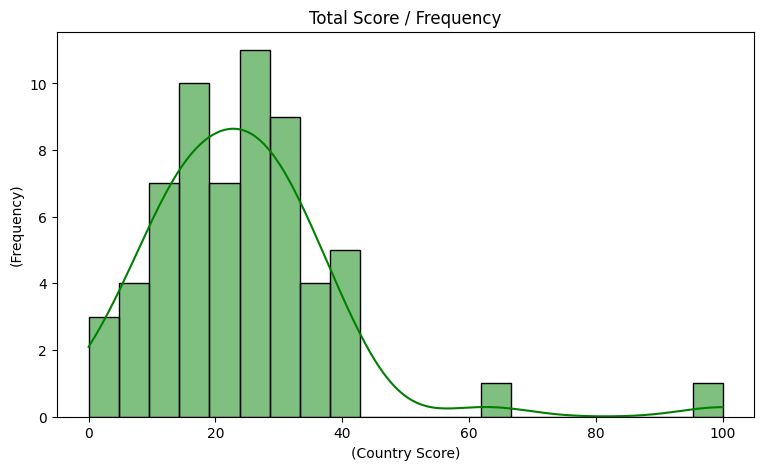

In [12]:
plot.figure(figsize=(9, 5))
sbn.histplot(dataframe["Total score"], bins=21, kde=True, color="green")
plot.title("Total Score / Frequency")
plot.xlabel("(Country Score)")
plot.ylabel("(Frequency)")
plot.show()

**Insights from exploring the data:**  

   - The dataset consists of 62 entries with 13 features, including categorical and numerical variables.  
   - No missing values were found, which simplifies preprocessing.    
   - Numerical features like **Talent, Infrastructure, and Operating Environment** have varying scales, justifying the need for standardization.  
   - Some features have a wide range (0 to 100), indicating possible outliers.
   - Heatmap helped in visualize feature correlations, which is useful for feature selection and reducing multicollinearity.  
   - By understanding the target variable’s distribution, I can ensure that the model selection, preprocessing, and evaluation metrics align with the data characteristics.

---



# **3. Feature engineering**

## Encoding Categorical Variables:

In [13]:
categorical_columns = dataframe.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pnd.DataFrame(ohe.fit_transform(dataframe[categorical_columns]))
categorical_encoded.columns = ohe.get_feature_names_out(categorical_columns)
dataframe = dataframe.drop(columns=categorical_columns).reset_index(drop=True)
dataframe = pnd.concat([dataframe, categorical_encoded], axis=1)

## Numerical feature scaling:
Feature scaling ensures that numerical variables are transformed to a comparable range, enhancing model convergence and accuracy.

In [14]:
scaler = StandardScaler()
numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
dataframe[numeric_columns] = scaler.fit_transform(dataframe[numeric_columns])

## Splitting data into train-set and test-set

In [15]:
X = dataframe.drop(columns=["Total score"])
y = dataframe["Total score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---



# **4. Model Training and Evaluation**

## Here to identify the optimal model for the dataset, I evaluated three different algorithms: Random Forest, Linear Regression , and Gradient Boosting.



In [16]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

## Evaluating the models

In [17]:
for name, model in models.items():
    print(f"\nTraining and Evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = nmp.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Results:")
    print(f"(MAE)Mean Absolute Error : {mae}")
    print(f"(MSE)Mean Squared Error : {mse}")
    print(f"(RMSE)Root Mean Squared Error : {rmse}")
    print(f"(R2)R-squared : {r2}")


Training and Evaluating Random Forest...
Random Forest Results:
(MAE)Mean Absolute Error : 0.42997747424299393
(MSE)Mean Squared Error : 1.0455026909579865
(RMSE)Root Mean Squared Error : 1.0224982596356762
(R2)R-squared : 0.5913491762838234

Training and Evaluating Linear Regression...
Linear Regression Results:
(MAE)Mean Absolute Error : 0.40932392137903967
(MSE)Mean Squared Error : 0.5745365573523084
(RMSE)Root Mean Squared Error : 0.7579818977734946
(R2)R-squared : 0.7754335407764991

Training and Evaluating Gradient Boosting...
Gradient Boosting Results:
(MAE)Mean Absolute Error : 0.38143815110571927
(MSE)Mean Squared Error : 0.901161715169496
(RMSE)Root Mean Squared Error : 0.9492953782514144
(R2)R-squared : 0.6477670689990643


## My insight from the above results:

- Linear Regression performed the best with the highest R² (0.775) and the lowest RMSE (0.757), indicating it captures variance well and makes more accurate predictions.

- Gradient Boosting performed moderately well with R² (0.647) but had a slightly higher error compared to Linear Regression.

- Random Forest had the lowest R² (0.591), meaning it did not generalize as well as the other models.

- Next I thought to test hyperparameter tuning for Random Forest and Gradient Boosting to see if it improves.

## Hyperparameter Tuning for Random Forest

In [18]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("\nBest Parameters - Random Forest:", rf_grid.best_params_)


Best Parameters - Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


## Hyperparameter Tuning for Gradient Boosting

In [19]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='r2')
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
print("\nBest Parameters - Gradient Boosting:", gb_grid.best_params_)


Best Parameters - Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


## Evaluating the model after hyperparameter tuning

In [20]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = nmp.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Tuned Results:")
    print(f"(MAE)Mean Absolute Error: {mae}")
    print(f"(MSE)Mean Squared Error: {mse}")
    print(f"(RMSE)Root Mean Squared Error: {rmse}")
    print(f"(R2)R-squared: {r2}")
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

tuned_results = {}
tuned_results["Random Forest"] = evaluate_model(best_rf, X_test, y_test, "Random Forest")
tuned_results["Gradient Boosting"] = evaluate_model(best_gb, X_test, y_test, "Gradient Boosting")

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

linear_results = {
    "MAE": mean_absolute_error(y_test, y_pred_linear),
    "MSE": mean_squared_error(y_test, y_pred_linear),
    "RMSE": nmp.sqrt(mean_squared_error(y_test, y_pred_linear)),
    "R2": r2_score(y_test, y_pred_linear)
}

tuned_results["Linear Regression"] = linear_results


Random Forest Tuned Results:
(MAE)Mean Absolute Error: 0.43997005764369573
(MSE)Mean Squared Error: 1.042895661627461
(RMSE)Root Mean Squared Error: 1.021222630785012
(R2)R-squared: 0.5923681738364699

Gradient Boosting Tuned Results:
(MAE)Mean Absolute Error: 0.3659877353027571
(MSE)Mean Squared Error: 0.7146497067443358
(RMSE)Root Mean Squared Error: 0.8453695681442146
(R2)R-squared: 0.7206681591015316


## Visualization comparison of Model Performance

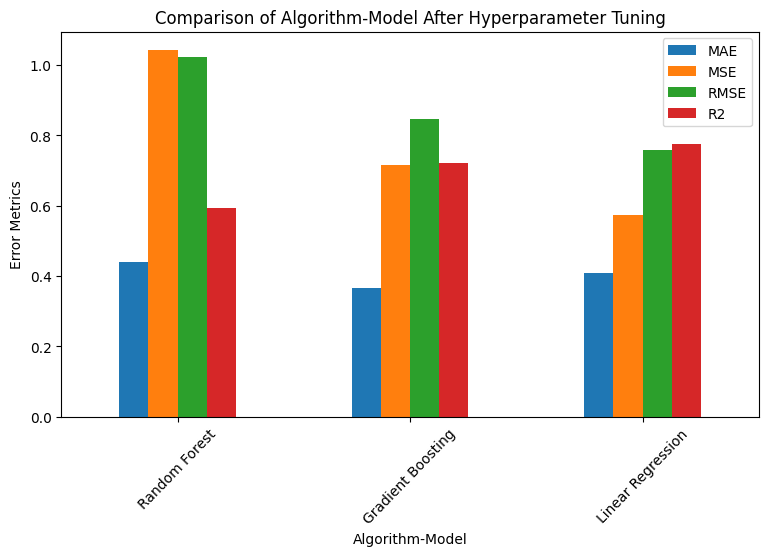

In [21]:
metrics_dataframe = pnd.DataFrame.from_dict(tuned_results, orient='index')
metrics_dataframe.plot(kind='bar', figsize=(9, 5))
plot.title("Comparison of Algorithm-Model After Hyperparameter Tuning")
plot.ylabel("Error Metrics")
plot.xlabel("Algorithm-Model")
plot.xticks(rotation=46)
plot.legend(loc='best')
plot.show()

## Final Comparison of the models
- Linear Regression is the best model for this dataset due to its highest accuracy and lowest error.

- Gradient Boosting(After Tuning) is an alternative but does not outperform Linear Regression.

- Random Forest shows bad performance before and after tuning.

---



# **5. Conclusion**

This project aimed to help the venture capital firm identify countries with high AI potential to guide their investment decisions. I was able to build a predictive model with the following key takeaways:

* **Linear Regression** provided the most accurate predictions of AI potential, offering valuable insights for prioritizing investment destinations.
* While **Gradient Boosting** also showed promising results, its performance did not surpass Linear Regression.
* **Random Forest** proved to be unsuitable for this task, and was abandoned.
* The insights gained from this project can empower the firm to make data-driven decisions, reducing risks and capitalizing on early opportunities in high-growth AI markets. This could potentially lead to cost reductions and establishing a strategic advantage over competitors.

By adopting this data-driven approach, the firm can optimize its investment strategy and maximize returns in the rapidly evolving AI sector.


---



# **6. Limitations**


* **Limited Dataset:** The AI Index dataset may not encompass all relevant factors influencing a country's AI potential. Other factors like cultural nuances, political stability, and regulatory environments could also play a role.
* **Data Accuracy:** The accuracy and completeness of the data within the AI Index dataset are subject to limitations. Potential biases or inaccuracies in data collecting process might affect the predictions.
* **Model Specificity:** The predictive model developed is specific to the features and timeframe of the AI Index dataset used. Its applicability to future scenarios or alternative datasets might be limited.
* **External Factors:** The model does not account for unmpredictable external events, such as global economic shifts or technological breakthroughs, that could significantly impact a country's AI landscape.
* **Generalizability:** The model's performance might vary when applied to other datasets or contexts. It's the need to validate and refine with newer data to ensure ongoing accuracy and relevance.